# KSA: Polar Observations and Modelling

# Week 5 - Hydrographic sections

<div style="float: right; margin-right: 20px; margin-left: 30px; width: 30%; max-width: 500px;">
    <img src="images/go_ship.png" width="100%"/>
</div>

Last class we worked with CTD profiles. Remember that oceanographic voyages are extremely expensive and time consuming, but they are the only method to obtain high quality data, which is vital to calibrate observations coming from other, cheaper observational platforms such as satellite, Argo, marine observing mammals, etc. 

Given the limited capability of ships to cover space and time, a lot of care goes into planning where a voyage goes and at what time in order to better capture the process/feature of interest. One of the priorities in our observing system is to monitor the evolution of the climate, for which it is important to sustain a network of long-term observations. The [GO-SHIP](https://www.go-ship.org/index.html) program is part of this long term monitoring effort, sustaining the repetition of hydrographic transects (or cross sections) at key locations.  

These surveys are typically carried out once a decade (at least) since the 1970s, in every ocean basin. ideally from coast to coast, and allow to monitor changes in the inventories of heat, freshwater, carbon, oxygen, nutrients, etc. This is an international effort: you can see a list of the countries involved [here](https://www.go-ship.org/RefSecs/goship_ref_secs.html). 

This class we are going to work with the I09S cross section that runs from the Antarctic continent to Fremantle at around 120E. This line has been "occupied" four times during the years 1995, 2004/05, 2012 and the latest one during 2024. We will start by taking a look at the historic occupations, and then compare to the most recent survey during 2024 part of the [(MISO)](https://aappartnership.org.au/miso/) voyage. 

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import glob
import gsw
import matplotlib.pyplot as plt
import metpy
import numpy as np
import xarray as xr

# Historical occupations from Easy Ocean

GO-SHIP has prepared a product called Easy Ocean, in which the CTD stations from a certain hydrographic line are interpolated onto a regular grid with a bunch of fancy smoothing and interpolation methods. 

By "regular grid" we mean a dataset in which we have data at fixed and regular latitude, longitude, depth locations. This makes life way easier! Remember how when we were working with the raw CTD profiles last class, we had to account for profiles of varying depth, which made things a bit harder for us.  

We can download past I09S (or any other GO-SHIP line) occupations from [here](https://cchdo.ucsd.edu/products/goship-easyocean). In Easy Ocean's gridded product, every cast has been interpolated to the same latitude, longitude point and the same depth levels. This makes it really easy to compare between occupations! Think that even though every occupation follows roughly the same line, the location of the stations and depth they go to is not the same, and the correct way to account for varying locations/depths can be quite complicated. But Easy Ocean has done that for us. Gridded products are great. 

Let's open the Easy Ocean product:

In [3]:
I09S = xr.open_dataset('/home/561/jn8053/g_jk72/KSA_Observations_Modelling/Class2/data/i09s.nc')

In [4]:
I09S

<xarray.Dataset> Size: 24MB
Dimensions:                   (gridded_section: 3, longitude: 1, latitude: 311,
                               pressure: 651)
Coordinates:
  * gridded_section           (gridded_section) float64 24B 1.0 2.0 3.0
  * longitude                 (longitude) float64 8B 114.7
  * latitude                  (latitude) float64 2kB -65.4 -65.3 ... -34.5 -34.4
  * pressure                  (pressure) float64 5kB 0.0 10.0 ... 6.5e+03
Data variables:
    temperature               (pressure, latitude, longitude, gridded_section) float64 5MB ...
    practical_salinity        (pressure, latitude, longitude, gridded_section) float64 5MB ...
    oxygen                    (pressure, latitude, longitude, gridded_section) float64 5MB ...
    conservative_temperature  (pressure, latitude, longitude, gridded_section) float64 5MB ...
    absolute_salinity         (pressure, latitude, longitude, gridded_section) float64 5MB ...
Attributes: (12/36)
    program:                       GO-Ship Easy Ocean. WOCE and GO-Ship gridd...
    Conventions:                   CF-1.7 ACDD-1.3
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         Gridded CTD product from WOCE and GO-Ship ...
    date_issued:                   20230927
    abstract:                      Ship-based hydrographic data are essential...
    ...                            ...
    creator_email:                 k.katsumata@jamstec.go.jp
    lineage:                       Data were created as described at: https:/...
    citation:                      The citation in a list of references is: "...
    acknowledgement:               Data were collected and made publicly avai...
    disclaimer:                    Data, products and services from CCHDO are...
    license:                       http://creativecommons.org/licenses/by/4.0/

In [5]:
I09S['pressure']

<xarray.DataArray 'pressure' (pressure: 651)> Size: 5kB
array([   0.,   10.,   20., ..., 6480., 6490., 6500.])
Coordinates:
  * pressure  (pressure) float64 5kB 0.0 10.0 20.0 ... 6.48e+03 6.49e+03 6.5e+03
Attributes:
    standard_name:    sea_water_pressure
    long_name:        sea_water_pressure
    units:            dbar
    reference_datum:  sea surface
    axis:             Z
    positive:         down
    valid_min:        -5.0
    valid_max:        12000.0
    whp_name:         CTDPRS

As you can see, the product contains 5 different variables, which have dimensions of `pressure, latitude, longitude, gridded_section`. The last dimension, `gridded_section` is the occupation number, 0 being 1995, 1 2004/05 and 2 2012. As you can see, 2024 has not made it to Easy Ocean yet.

Let's do a simple plot of the `temperature` from the first occupation:

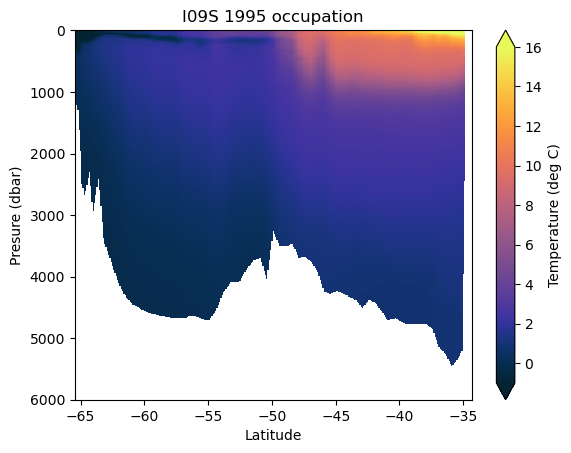

In [5]:
i09s_temperature = I09S['temperature'].isel(gridded_section = 0).squeeze()
i09s_temperature.plot(vmin = -1, vmax = 16, cmap = cm.cm.thermal,
                      cbar_kwargs = {'label':'Temperature (deg C)'})
plt.gca().invert_yaxis()
plt.title('I09S 1995 occupation')
plt.xlabel('Latitude')
plt.ylabel('Presure (dbar)');
plt.ylim(6000, None);

Now we know the code works, we can extend it to plot all the occupations, side by side:

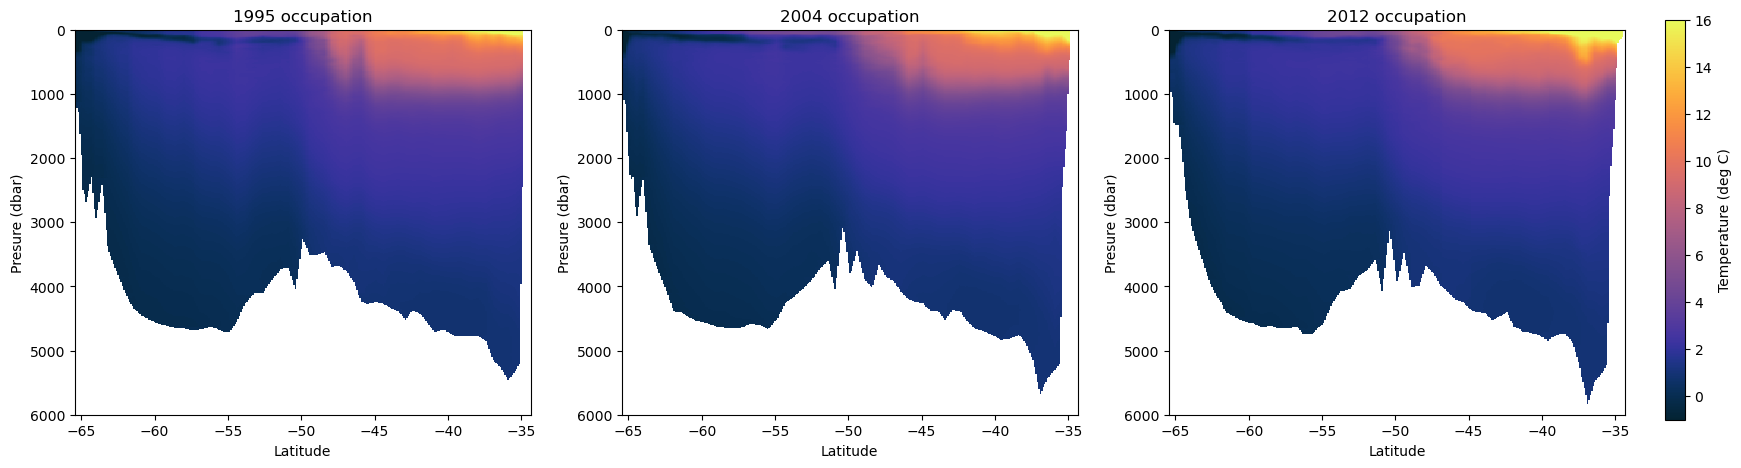

In [6]:
fig, axs = plt.subplots(1, 3, figsize = (20,5))
for i in range(0, 3):
    i09s_temperature = I09S['temperature'].isel(gridded_section = i).squeeze()
    pt = i09s_temperature.plot(ax = axs[i], vmin = -1, vmax = 16, cmap = cm.cm.thermal,
                               add_colorbar = False)

cbax = plt.axes([0.92, 0.1, 0.01, 0.8])
cbar = plt.colorbar(pt, cax = cbax, orientation = 'vertical')
cbar.ax.set_ylabel('Temperature (deg C)')

for ax in axs:
    ax.invert_yaxis()
    ax.set_ylim(6000, None)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Presure (dbar)');   
axs[0].set_title('1995 occupation')
axs[1].set_title('2004 occupation')
axs[2].set_title('2012 occupation');

Look carefully at this figure, focus on the white area of the plot. Looking fast, you would probably assume this is "earth", or the bottom. But notice how it varies from occupation to occupation! The mid-ocean ridge looks diffferent in 1995, and the deep trough near Australia is deeper in 2012. This does not mean the ocean's bathymetry has changed (it can, but in timescales of millions of years, not decades). 

What happens is that, for whatever reason, the CTD's have probably gone to different depths in each of these occupations. We could leave it blank, but we can also plot the actual topography.

In [11]:
bathymetry = xr.open_dataset('/home/561/jn8053/g_jk72/KSA_Observations_Modelling/Class2/data/ETOPO_2022_v1_bed.nc')
bathymetry = bathymetry.sel(lon = 114.7, method = 'nearest')

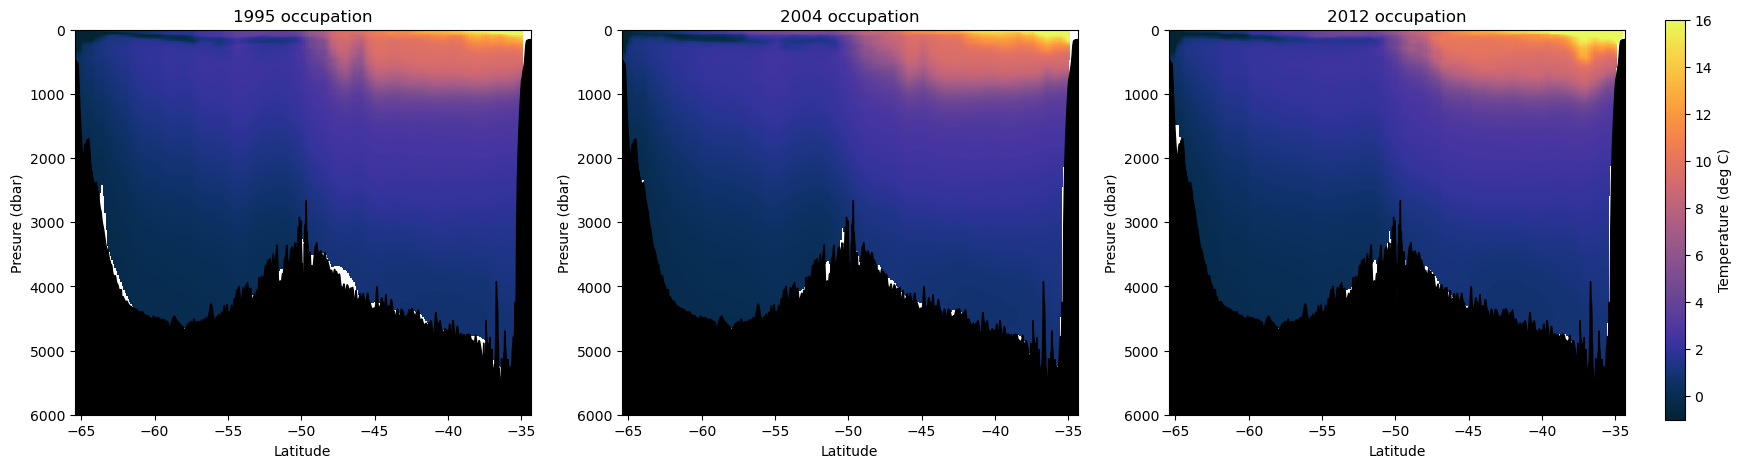

In [28]:
fig, axs = plt.subplots(1, 3, figsize = (20,5))
for i in range(0, 3):
    i09s_temperature = I09S['temperature'].isel(gridded_section = i).squeeze()
    pt = i09s_temperature.plot(ax = axs[i], vmin = -1, vmax = 16, cmap = cm.cm.thermal,
                               add_colorbar = False)

cbax = plt.axes([0.92, 0.1, 0.01, 0.8])
cbar = plt.colorbar(pt, cax = cbax, orientation = 'vertical')
cbar.ax.set_ylabel('Temperature (deg C)')

for ax in axs:
    ax.invert_yaxis()
    ax.set_ylim(6000, None)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Presure (dbar)');   
    ax.fill_between(bathymetry['z']['lat'], 6000, -bathymetry['z'], color = 'k')
axs[0].set_title('1995 occupation')
axs[1].set_title('2004 occupation')
axs[2].set_title('2012 occupation');

As you can see this is still not perfect! But it will do for this class. Note how in the space of a less than a degree latitude, we have changes of around 1000m in the topography. This means that if the boat did the CTD station with a bit of an offset, they might be hitting a deeper section of the ocean, or the other way around. 

#### Question 1

**a.** Plot cross sections of salinity and oxygen using appropriate colormaps. You can choose from `cmocean`'s [colormaps](https://matplotlib.org/cmocean/) if you'd like. Describe the features you see in these cross sections. 

**b.** Can you identify any changes between occupations?

**Suggestion: try plotting the difference between 2012 and 2004, or 2004 and 1995. Is this of any help?**

*Spoiler: the plot above is not easy to understand! There will be a number of small scale features, specially at the surface and some "stripey" patterns throughout the water column. Remember that these hydrographic surveys represent a snapshot in time. These snapshots include eddies, meanders and other types of high frequency variability in the ocean that would average out if we were taking a long enough period.*

*Answer here*

# Latest occupation - MISO voyage

The latest occupation during February 2024 has not yet made its way to the GO-SHIP Easy Ocean product. But we can use the individual CTD profiles to interpolate to the same points as the historical occupations and look at the most recent changes.
 
First, open the CTD files like we did last class in `2_Multiple_CTDs.ipynb`. Since we are at it, let's extract the locations (latitude, longitude) from the profiles as well.

In [8]:
path_to_files = glob.glob('/home/561/jn8053/g_jk72/KSA_Observations_Modelling/Class2/data/*Ctd*') 
path_to_files = np.sort(path_to_files)

CTDs = {}; lat = []; lon = []
for i in range(0, len(path_to_files)):
    CTDs[i] = xr.open_dataset(path_to_files[i])
    lat.append(CTDs[i]['latitude'].item())
    lon.append(CTDs[i]['longitude'].item())

Let's do a quick plot of the locations to check our files are in order:

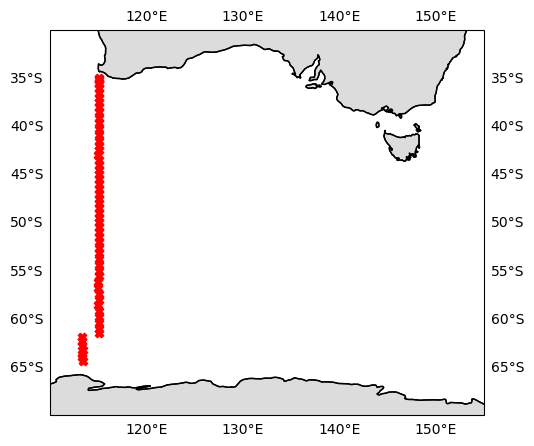

In [9]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude = 130))
ax.set_extent([110, 155, -70, -30], crs = ccrs.PlateCarree())
ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gainsboro'))
ax.coastlines(resolution = "50m")
gl = ax.gridlines(draw_labels = True, linewidth = 0)
gl.xformatter = ccrs.cartopy.mpl.ticker.LongitudeFormatter()
gl.yformatter = ccrs.cartopy.mpl.ticker.LatitudeFormatter()
ax.scatter(lon, lat, marker = 'X', color = 'red', transform = ccrs.PlateCarree());

Locations look good. Now we need to start the interpolation. We need to somehow "project" the CTD profiles onto the latitude and longitude locations in the Easy Ocean product. Remember that I09S in Easy Ocean is a purely meridional transect at 114.7$^{\circ}$E, with data for:

 - Latitudes between 65.4$^{\circ}$S and 34.4$^{\circ}$S every 0.1$^{\circ}$.
 - Pressures from the surface (0 dBar) to 6500 dBar. Once you hit the bottom, the gridded product has `nan`s (not a number) instead of actual values.

So we need to translate our individual casts into something with the shape and dimensions of Easy Ocean. We will do that in two separate steps:

1. Interpolate our pressure levels to those in the Easy Ocean grid.
2. Interpolate our (lat, lon) points to those in the Easy Ocean grid.

Remember that we need to do the spatial interpolation in 2. because the locations are not exactly the same between occupations:

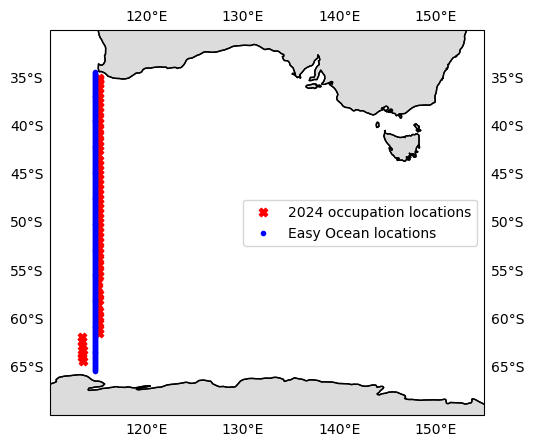

In [29]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude = 130))
ax.set_extent([110, 155, -70, -30], crs = ccrs.PlateCarree())
ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gainsboro'))
ax.coastlines(resolution = "50m")
gl = ax.gridlines(draw_labels = True, linewidth = 0)
gl.xformatter = ccrs.cartopy.mpl.ticker.LongitudeFormatter()
gl.yformatter = ccrs.cartopy.mpl.ticker.LatitudeFormatter()
ax.scatter(lon, lat, marker = 'X', color = 'red', transform = ccrs.PlateCarree(),
           label = '2024 occupation locations');
ax.scatter(I09S['longitude']*np.ones(311), I09S['latitude'], marker = '.', color = 'blue', 
           transform = ccrs.PlateCarree(), label = 'Easy Ocean locations');
plt.legend(loc = 'center right');

### Interpolation to pressure levels

Lets start with the interpolation of the pressure level. We will create an empty `xr.DataArray` fill it with the profiles interpolated to the Easy Ocean pressure levels. To create a `DataArray`, we need to feed it a numerical array, which in our case will be an empty array with dimensions of `[number of CTDs x target pressure levels]`. We also need to provide coordinate information in the following way: `coords = {'name_of_dimensions': coordinate_values}`. In our case, we will call the dimensions `CTD_number` and `pressure`.

For the interpolation, we will use the `xarray.interp()` function with a "linear" method. There are other methods of interpolation available (you can check them out [here](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.interp.html)). They will usually give different results, so you need to be careful and make an educated choice depending on your data structure and type. 

In [38]:
temp_interp = xr.DataArray(data = np.empty([len(CTDs), len(I09S['pressure'])]),
                           coords = {'CTD_number': np.arange(0, len(CTDs), 1),
                                     'pressure': I09S['pressure'].values})
for i in range(0, len(CTDs)):
    # Interpolate the CTD
    CTD_interp = CTDs[i].interp(pressure = I09S['pressure'].values, method = 'linear').squeeze()
    # Fill the temp_interp array with the profile.=
    temp_interp.loc[{'CTD_number':i}] = CTD_interp['temperature'].values

Now we can add the extra info that fully characterises this array (latitude and longitude information):

In [39]:
temp_interp = temp_interp.assign_coords(longitude = ('CTD_number', lon), latitude = ('CTD_number', lat))

### Interpolation to I09S Easy Ocean locations

Now we need to interpolate, or project, or CTD stations onto the locations from the Easy Ocean gridded product. We will use a function from the library `metpy` which has a lot of really useful functions for meteorology that can be applied in most cases to oceanographic data. There are a lot of interpolation functions available, but we will use one called [`interpolate_to_points`](https://unidata.github.io/MetPy/latest/api/generated/metpy.interpolate.interpolate_to_points.html).

In [30]:
help(metpy.interpolate.interpolate_to_points)

Help on function interpolate_to_points in module metpy.interpolate:

interpolate_to_points(points, values, xi, interp_type='linear', minimum_neighbors=3, gamma=0.25, kappa_star=5.052, search_radius=None, rbf_func='linear', rbf_smooth=0)
    Interpolate unstructured point data to the given points.
    
    This function interpolates the given `values` valid at ``points`` to the points `xi`.
    This is modeled after `scipy.interpolate.griddata`, but acts as a generalization of it by
    including the following types of interpolation:
    
    - Linear
    - Nearest Neighbor
    - Cubic
    - Radial Basis Function
    - Natural Neighbor (2D Only)
    - Barnes (2D Only)
    - Cressman (2D Only)
    
    Parameters
    ----------
    points: array-like, (N, P)
        Coordinates of the data points.
    values: array-like, (N,)
        Values of the data points.
    xi: array-like, (M, P)
        Points to interpolate the data onto.
    interp_type: str
        What type of interpolation t

We need to feed this function three things:
- The original locations of the observations, which we will call `points`
- The values of the observations at these locations, in our case temperature, which we will call `values`
- The target locations of interpolation, the Easy Ocean locations, which we will call `xi`

In the `help()` documentation above you can see that the function requires each of these inputs in a specific shape, where `N` is the number of original points; `P` is the number of dimensions which in our case is two, latitude and longitude; and `M` the number of target points.

In [41]:
points = np.stack([lon, lat], axis = 1)
print('The shape of points is :'+str(np.shape(points)))
values = temp_interp.values
print('The shape of values is :'+str(np.shape(values)))
xi = np.stack([np.ones(len(I09S['latitude']))*I09S['longitude'].values, 
               I09S['latitude'].values], axis = 1)
print('The shape of xi is :'+str(np.shape(xi)))

The shape of points is :(60, 2)
The shape of values is :(60, 651)
The shape of xi is :(311, 2)


We have the data in the correct shape! Let's interpolate using the method `nearest`. As with `xarray.interp()`, `metpy`'s interpolations are available for a number of different methods, and they will give different results. `nearest` is a good first choice, because it is not doing any fancy treatment to the data that could generate fake features. It just grabs the neareset data available!

In [42]:
I09S_new_temperature = metpy.interpolate.interpolate_to_points(points, values, xi, interp_type = 'nearest')
# Create a dataarray
I09S_new_temperature = xr.DataArray(np.transpose(I09S_new_temperature), 
                                    coords = I09S['temperature'].isel(gridded_section = 0).squeeze().coords,
                                    name = 'temperature')

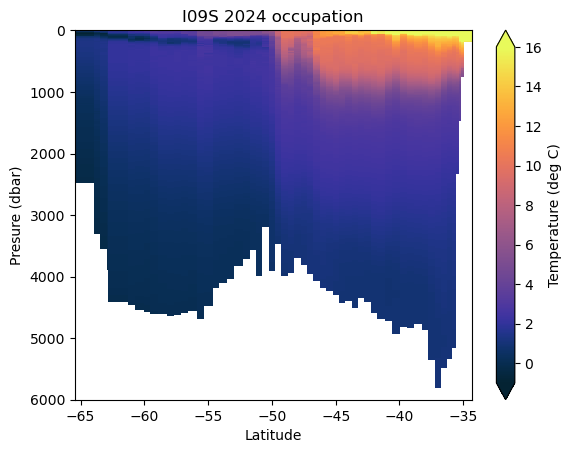

In [44]:
I09S_new_temperature.plot(vmin = -1, vmax = 16, cmap = cm.cm.thermal,
                          cbar_kwargs = {'label':'Temperature (deg C)'})
plt.gca().invert_yaxis()
plt.title('I09S 2024 occupation')
plt.xlabel('Latitude')
plt.ylabel('Presure (dbar)');
plt.ylim(6000, None);

Let's compare a couple of different interpolation methods just for fun and to illustrate how sensitive the result will be to our choice:

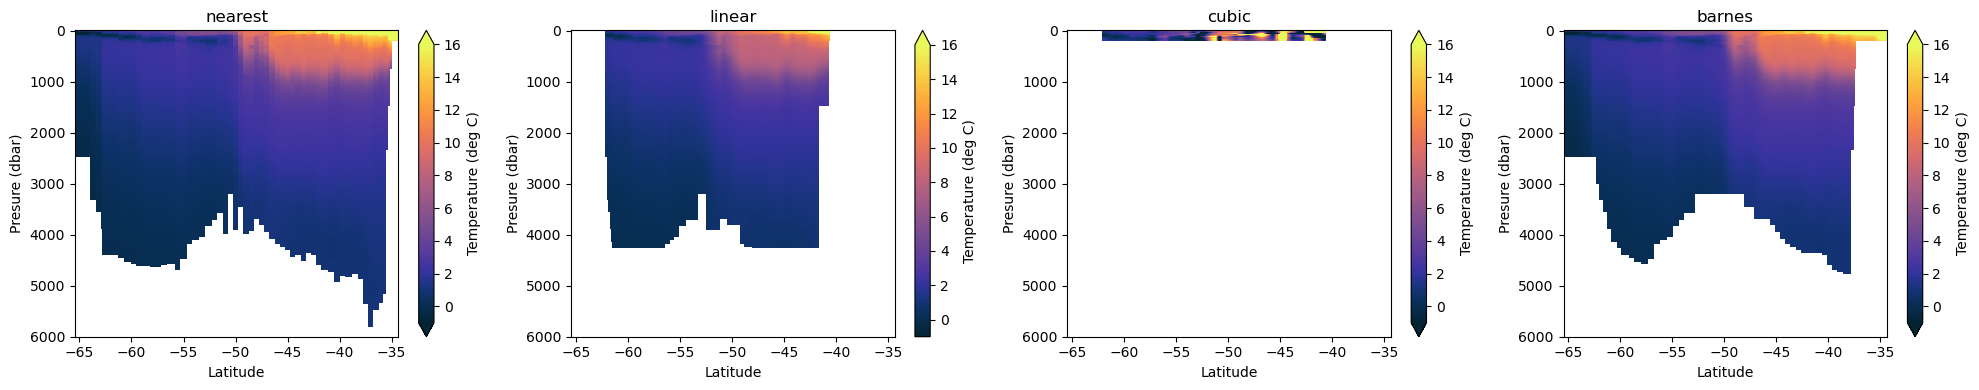

In [48]:
fig, axs = plt.subplots(1, 4, figsize = (20, 4))
n = 0
for method in ['nearest', 'linear', 'cubic', 'barnes']:
    I09S_temp_interp_method = metpy.interpolate.interpolate_to_points(points, values, xi, interp_type = method)
    # Create a dataarray
    I09S_temp_interp_method = xr.DataArray(np.transpose(I09S_temp_interp_method), 
                                           coords = I09S['temperature'].isel(gridded_section = 0).squeeze().coords,
                                           name = 'temperature')
    I09S_temp_interp_method.plot(ax = axs[n], vmin = -1, vmax = 16, cmap = cm.cm.thermal,
                                 cbar_kwargs = {'label':'Temperature (deg C)'})
    axs[n].invert_yaxis()
    axs[n].set_title(method)
    axs[n].set_xlabel('Latitude')
    axs[n].set_ylabel('Presure (dbar)');
    axs[n].set_ylim(6000, None);
    n += 1
plt.tight_layout();

As you can see they are very different! We will stick to the `nearest` method to avoid any spurious features caused by the interpolation.

However, note how crude our interpolation looks compared to the Easy Ocean ones. Ours doesn't look as smooth, you can see the vertical stripes everywhere, particularly south of around 62$^{\circ}$S, where if you note in our location plots above, during the 2024 occupation some stations close to the Antarctic continent are further west than the rest of the line. 

As you can read in the [GO-SHIP paper](https://www.nature.com/articles/s41597-022-01212-w), there is quite a lot more work done to in Easy Ocean than what we have done. There are several filters applied to the interpolation, both vertically and horizontally, to smooth out features. All these fancy methods are out of the scope of what we want to do in these classes, so we will keep our simple interpolation. It is good to use!

#### Question 2

Repeat the interpolation for practical salinity and oxygen, and make a figure with three panels (one for temperature, one for salinity and one for oxygen). 

*Answer here*

#### Question 3

**a.** Using `gsw` calculate conservative temperature and absolute salinity for I09S. You can look at the `2_Multiple_CTDs.ipynb` for guidance. Plot them in a figure with two panels.

**b.** Merge the temperature, practical salinity, conservative temperature, absolute salinity and oxygen dataarrays into one dataset, and save using the `.to_netcdf(path_to_save/name.nc)` function. You can compare your saved file to `data/I09S_2024.nc` to verify it was done correctly. Don't forget the attributes and metadata! It is good practice to document your datasets thoroughly.

*Answer here*